In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import t
import scipy.stats as stats


In [2]:
#Reading the dataset
df=pd.read_csv('T1_A24census8.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7905 non-null   int64 
 1   Street                         7905 non-null   object
 2   First Name                     7905 non-null   object
 3   Surname                        7897 non-null   object
 4   Age                            7905 non-null   int64 
 5   Relationship to Head of House  7358 non-null   object
 6   Marital Status                 6100 non-null   object
 7   Gender                         7905 non-null   object
 8   Occupation                     7905 non-null   object
 9   Infirmity                      104 non-null    object
 10  Religion                       6930 non-null   object
dtypes: int64(2), object(9)
memory usage: 679.5+ KB


In [4]:
df.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             8
Age                                 0
Relationship to Head of House     547
Marital Status                   1805
Gender                              0
Occupation                          0
Infirmity                        7801
Religion                          975
dtype: int64

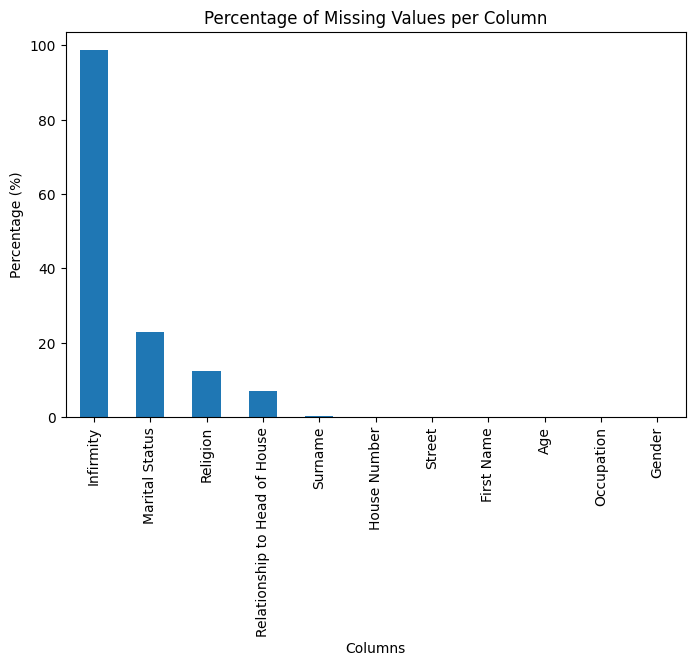

In [5]:
# Calculate missing values percentage
missing_percentage = df.isnull().mean() * 100

# Plot the missing data as a bar plot
plt.figure(figsize=(8, 5))
missing_percentage.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Missing Values per Column')
plt.savefig('./Percentage_of_missing_columns.png', bbox_inches='tight')
plt.show()

In [6]:
df['Marital Status'].unique()

array(['Married', nan, 'Single', 'Divorced', 'Widowed'], dtype=object)

In [7]:
df['Relationship to Head of House'].unique()

array(['Head', 'Husband', 'Daughter', 'Son', nan, 'Partner', 'Wife',
       'Cousin', 'Granddaughter', 'Adopted Daughter', 'Lodger', 'Sibling',
       'Grandson', 'Step-Son', 'Step-Daughter', 'Visitor', 'Adopted Son',
       'Nephew', 'Niece', 'Daughter-in-law', 'Adopted Grandson'],
      dtype=object)

In [8]:
df['Infirmity'].unique()

array([nan, 'Blind', 'Unhealthy', 'Mental Disability',
       'Unknown Infection', 'Physical Disability', ' ', 'Disabled',
       'Deaf'], dtype=object)

In [9]:
df['Religion'].unique()

array(['Christian', 'No Religion', nan, 'Hindu', 'Muslim', 'Sikh',
       'Venatori', 'Mormon', 'The Order of the Pheonix'], dtype=object)

In [10]:
df['Surname'].unique()

array(['Davies', 'Davies-Tomlinson', 'Rowe', 'Holloway', 'Rogers', 'Wade',
       'Green', 'Barker', 'Hunt', 'Potter', 'Gill', 'Akhtar', 'John',
       'Evans', 'Collins', 'Jackson', 'Richards', 'Alexander',
       'Greenwood', 'Kelly', 'Gregory', 'Mills-Gregory', 'White', 'Allen',
       'Scott', 'Lambert', 'Fox', 'James', 'Taylor', 'Stephens',
       'Chambers', 'Lewis', 'Morton', 'Brown', 'Atkins', 'Peters',
       'Slater', 'Wright', 'Morris', 'Gibbs', 'Duncan', 'Owen', 'Hancock',
       'Archer', 'Chan', 'Joyce', 'Jarvis', 'Singh', 'Young', 'Pearce',
       'Clark', 'Riley', 'Roberts', 'Carter', 'Nash', 'Ellis', 'Mason',
       'Davey-Mason', 'Chapman', 'Mills', 'Hussain', 'Wood', 'Gallagher',
       'Jones', 'Marsh', 'Steele', 'Perry', 'Hughes', 'Robson',
       'Clements', 'Warren', 'Rowley', 'Herbert', 'Adams',
       'Palmer-Pearce', 'Khan', 'Hall', 'Haynes', 'Bibi', 'Reid',
       'Williams', 'Davis', 'Watson', 'Smith', 'Jennings', 'Watkins',
       'Woodward', 'Hill', 'Heath

In [11]:
df['Age'].unique()

array([ 44,  45,  16,  13,  11,  39,  15,   8,   6,  50,  53,  25,  22,
        17,  43,  47,  10,  80, 101, 105,  21,  31,  52,  60,  30,  51,
        49,  33,  41,  36,  37,  66,  81,  78,  56,  27,   0,  19,  55,
        69,  72,  84,  85,  65,  34,  48,   9,  26,  23,  67,  62,  76,
        58,  54,  35,  28,  61,  89,   1,  24,  20,  79,   5,   7,  73,
        68,  86,   2,  14,  18,  29,  59,   4,  32,  40,  87,  63,  38,
        71,  75,  12,  77,   3,  46,  64,  83,  70,  57,  42,  96,  94,
        93,  82,  74,  97,  88,  98,  95,  90, 100,  99, 103, 104, 102,
        91])

In [12]:
df['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [13]:
# Print the unique occupations
all_occupations = df['Occupation'].unique().tolist()
print(len(all_occupations))
print(all_occupations)


1079
['Unemployed', 'Counselling psychologist', 'Student', 'Legal executive', 'Geneticist, molecular', 'Television camera operator', 'University Student', 'Fisheries officer', 'Charity fundraiser', 'Research officer, government', 'Musician', 'Retired Furniture designer', 'Retired Psychologist, forensic', 'Retired Broadcast presenter', 'Astronomer', 'Pilot, airline', 'Press photographer', 'Radio broadcast assistant', 'Librarian, public', 'Museum/gallery curator', 'Microbiologist', 'Further education lecturer', 'Ambulance person', 'Office manager', 'Teacher, adult education', 'Development worker, community', 'Retired Sports administrator', 'Retired Investment banker, operational', 'Pharmacist, community', 'Risk manager', 'Chief of Staff', 'Engineer, materials', 'Child', 'Programmer, multimedia', 'Community education officer', 'Retired Soil scientist', 'Retired Medical physicist', 'Retired Ergonomist', 'Retired Designer, exhibition/display', 'Statistician', 'Clothing/textile technologist'

### Data preprocessing

#### Filling Surname

In [14]:
nan_Srows = df[df['Surname'].isnull()]
nan_Srows

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
841,113,Green Road,Ricky,NaN,37,Husband,Married,Male,Building services engineer,NaN,No Religion
3502,3,Kestrel Path,Glen,NaN,69,Husband,Married,Male,"Retired Engineer, electrical",NaN,Christian
4457,145,Belle Street,Samuel,NaN,48,Husband,Married,Male,"Physicist, medical",NaN,Christian
4580,17,Statue Centers,Vincent,NaN,61,Husband,Married,Male,Computer games developer,NaN,Christian
6374,12,Elliott Square,Josephine,NaN,62,Wife,Married,Female,Arboriculturist,NaN,No Religion
6902,3,Clark Crescent,Alan,NaN,58,Husband,Married,Male,Product manager,NaN,Christian
7561,9,Snapdragon Road,Martin,NaN,45,Husband,Married,Male,Airline pilot,NaN,No Religion
7684,15,Newton Lock,Brett,NaN,60,Husband,Married,Male,Clothing/textile technologist,NaN,No Religion


In [15]:
#This function first extracts all rows having surname values Nan
#Then iterate over the above extracted rows
#For every row we get the house number and Street 
#We fetch the rows of people in the same house from our dataset by matching the house number and street of null row
#From the above we check which row has the value "Head" under the relationship tou house columns
#we extract the surname of the head and assign it to the surname name of the row which had nan surname
def fill_surname(df):
    null_indices = df[df['Surname'].isnull()]
    for i, row in null_indices.iterrows():
        house_number = row['House Number']
        street = row['Street']
        same_household = df[(df['House Number'] == house_number) & (df['Street'] == street)]
        #print(same_household)
        house_head = same_household[same_household['Relationship to Head of House'] == 'Head']
        if not house_head.empty:
            #iloc is a pandas method used to access rows and columns by their index position.
            head_surname = house_head.iloc[0]['Surname']
            #The at method is used to update the specific value in the DataFrame. Here, we update the Surname column for the corresponding index i.
            df.at[i, 'Surname'] = head_surname  
    
    return df

df = fill_surname(df)
df


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Thomas Roads,Marilyn,Davies,44,Head,Married,Female,Unemployed,NaN,Christian
1,1,Thomas Roads,Mohammed,Davies-Tomlinson,45,Husband,Married,Male,Counselling psychologist,NaN,No Religion
2,1,Thomas Roads,Anna,Davies-Tomlinson,16,Daughter,NaN,Female,Student,NaN,Christian
3,1,Thomas Roads,Caroline,Davies-Tomlinson,13,Daughter,NaN,Female,Student,NaN,Christian
4,1,Thomas Roads,Denis,Davies-Tomlinson,11,Son,NaN,Male,Student,NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...
7900,1,Parker Abbey,Sophie,Powell,54,Head,Single,Female,"Engineer, drilling",NaN,Christian
7901,1,Parker Abbey,Ashley,Bailey,55,Partner,Single,Male,Event organiser,NaN,Christian
7902,1,Parker Abbey,Diane,Powell,15,Daughter,NaN,Female,Student,NaN,No Religion
7903,1,Parker Abbey,Hayley,Powell,11,Daughter,NaN,Female,Student,NaN,No Religion


In [16]:
df.loc[4457]

House Number                                    145
Street                                 Belle Street
First Name                                   Samuel
Surname                                       Smith
Age                                              48
Relationship to Head of House               Husband
Marital Status                              Married
Gender                                         Male
Occupation                       Physicist, medical
Infirmity                                       NaN
Religion                                  Christian
Name: 4457, dtype: object

### Filling Relationship to Head of House

In [17]:
nan_Rrows = df[df['Relationship to Head of House'].isnull()]
nan_Rrows

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
27,1,Iron Avenue,Debra,Gill,31,NaN,Divorced,Female,Unemployed,NaN,No Religion
28,1,Iron Avenue,John,Akhtar,52,NaN,Single,Male,Astronomer,NaN,No Religion
132,6,Hunter Squares,Allan,Chapman,22,NaN,Single,Male,University Student,NaN,No Religion
133,6,Hunter Squares,Linda,Mills,19,NaN,Single,Female,University Student,NaN,Christian
134,6,Hunter Squares,Albert,Taylor,21,NaN,Single,Male,University Student,NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...
7878,1,Virgo Villa,Linda,Hill,18,NaN,Single,Female,Student,NaN,NaN
7887,1,Castor Fort,Lucy,Hughes,63,NaN,Single,Female,"Librarian, public",NaN,Christian
7888,1,Castor Fort,Terry,Hope,30,NaN,Divorced,Male,Unemployed,NaN,Christian
7889,1,Castor Fort,Declan,Parsons,53,NaN,Single,Male,Training and development officer,NaN,Christian


In [18]:
#This function first extracts all rows having Relationship to Head of House values Nan
#Then iterate over the above extracted rows
#For every row we get the house number and Street 
#We fetch the rows of people in the same house from our dataset by matching the house number and street of null row
#If people in the same house does not have head then we take the max age and assign that person as head
#If head is present in this house then based on Age, gender and marital status assign the relationship respectively
#If above conditions does not satisfy then  assign the nan value to "Others"
def fill_relationship_to_head(df):
    null_indices = df[df['Relationship to Head of House'].isnull()]
    
    for i, row in null_indices.iterrows():
        house_number = row['House Number']
        street = row['Street']
        same_household = df[(df['House Number'] == house_number) & (df['Street'] == street)]
        
        # First check if there is already a head in the house
        if not same_household['Relationship to Head of House'].str.contains('Head').any():
            # Assign the oldest person as head of the house
            head_row = same_household[same_household['Age'] == same_household['Age'].max()]
            
            if not head_row.empty:
                # Assign 'Head' to the oldest person in the household
                df.at[head_row.index[0], 'Relationship to Head of House'] = 'Head'
        
        # Now, fill other relationships
        for j, relationship_row in same_household.iterrows():
            if pd.isna(relationship_row['Relationship to Head of House']):
                # Assign 'Son' or 'Daughter' based on age and gender
                if relationship_row['Age'] < 25 and relationship_row['Gender'] == 'Male':
                    df.at[j, 'Relationship to Head of House'] = 'Son'
                elif relationship_row['Age'] < 25 and relationship_row['Gender'] == 'Female':
                    df.at[j, 'Relationship to Head of House'] = 'Daughter'
                # Assign 'Husband' or 'Wife' based on age and marital status
                elif relationship_row['Age'] >= same_household[same_household['Relationship to Head of House'] == 'Head'].iloc[0]['Age'] and relationship_row['Gender'] == 'Male' and relationship_row['Marital Status'] == 'Married':
                    df.at[j, 'Relationship to Head of House'] = 'Husband'
                elif relationship_row['Age'] <= same_household[same_household['Relationship to Head of House'] == 'Head'].iloc[0]['Age'] and relationship_row['Gender'] == 'Female' and relationship_row['Marital Status'] == 'Married':
                    df.at[j, 'Relationship to Head of House'] = 'Wife'
                else:
                    # Default to 'Others' for unrecognized relationships
                    df.at[j, 'Relationship to Head of House'] = 'Others'
    
    return df
df = fill_relationship_to_head(df)

In [19]:
df.loc[7890]

House Number                                            1
Street                                        Castor Fort
First Name                                        Gregory
Surname                                          Charlton
Age                                                    48
Relationship to Head of House                      Others
Marital Status                                     Single
Gender                                               Male
Occupation                       Programmer, applications
Infirmity                                             NaN
Religion                                        Christian
Name: 7890, dtype: object

### Marital Status

In [20]:
#Finding the number of rows with incorrect data
count = df[(df['Age']<18) & (df['Marital Status'].isin(['Married','Divorced','Widowed']))].shape[0]
print(count)

34


In [21]:
df[df['Marital Status'].isnull()]
# there are 1805 null values and 34 incorrect values

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,1,Thomas Roads,Anna,Davies-Tomlinson,16,Daughter,NaN,Female,Student,NaN,Christian
3,1,Thomas Roads,Caroline,Davies-Tomlinson,13,Daughter,NaN,Female,Student,NaN,Christian
4,1,Thomas Roads,Denis,Davies-Tomlinson,11,Son,NaN,Male,Student,NaN,Christian
6,2,Thomas Roads,Timothy,Rowe,15,Son,NaN,Male,Student,NaN,NaN
7,2,Thomas Roads,Andrea,Rowe,11,Daughter,NaN,Female,Student,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7896,1,Trawler Castle,Dale,Gill,7,Son,NaN,Male,Student,NaN,No Religion
7897,1,Trawler Castle,Josephine,Gill,3,Daughter,NaN,Female,Child,Disabled,No Religion
7902,1,Parker Abbey,Diane,Powell,15,Daughter,NaN,Female,Student,NaN,No Religion
7903,1,Parker Abbey,Hayley,Powell,11,Daughter,NaN,Female,Student,NaN,No Religion


In [22]:
df[(df['Age']<18) & (df['Marital Status'].isin(['Married','Divorced','Widowed']))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
115,26,Atholl Lane,Francesca,Carter,5,Daughter,Married,Female,Student,NaN,Christian
186,14,Hove Close,Scott,Khan,4,Son,Divorced,Male,Child,NaN,NaN
815,104,Green Road,Dominic,Jones,4,Son,Married,Male,Child,NaN,No Religion
1010,161,Green Road,Jade,Murphy,15,Daughter,Married,Female,Student,NaN,No Religion
1212,39,Sheppard Fields,Gerard,Dunn,3,Son,Divorced,Male,Child,NaN,NaN
1347,11,White Lodge,Amelia,Wall,3,Granddaughter,Married,Female,Child,NaN,NaN
1624,12,Alba Drive,Guy,Ingram,17,Son,Married,Male,Student,NaN,Christian
1675,31,Silver Lane,Karl,Cox,5,Son,Married,Male,Student,NaN,No Religion
2689,12,Bates Street,Bruce,Conway,2,Son,Married,Male,Child,NaN,Christian
2810,53,Bates Street,Charles,Thompson,8,Son,Married,Male,Student,NaN,Christian


In [23]:
#Check for other members in the same household.
#If a person lives in the same household as someone listed as "Married," assign "Married."
#If no spouse is found but the age is >60 years, assign "Widowed."
#If there is no information about other household members, consider assigning a default like "Unknown."
#Along with missing values we are also correcting the incorrect data that is for people < 18 assigning the marital status to "Single"

# Group the data by households
for i, row in df.iterrows():
    # Handle missing marital status
    if pd.isna(row['Marital Status']):  
        household = df[(df['House Number'] == row['House Number']) & (df['Street'] == row['Street'])]
        
        #below 18 years
        if row['Age'] < 18:
            df.at[i, 'Marital Status'] = 'Single'
        
        # 18-60 years and >60 years 
        elif 18 <= row['Age'] <= 60:
            # Check if there's a "Married" person in the same household
            if 'Married' in household['Marital Status'].values:
                df.at[i, 'Marital Status'] = 'Married'
            else:
                df.at[i, 'Marital Status'] = 'Unknown'  # Default when no information is available
        
        elif row['Age'] > 60:
            # Check if there's a "Married" person in the same household
            if 'Married' in household['Marital Status'].values:
                df.at[i, 'Marital Status'] = 'Married'
            else:
                df.at[i, 'Marital Status'] = 'Widowed'
    
    # Correct invalid marital status based on age
    elif row['Age'] < 18 and row['Marital Status'] in ['Married', 'Divorced', 'Widowed']:
        df.at[i, 'Marital Status'] = 'Single'



In [24]:
count = df[(df['Age']<18) & (df['Marital Status'].isin(['Married','Divorced','Widowed']))].shape[0]
print(count)

0


### Religion

In [25]:
df['Religion'].mode()

0    Christian
Name: Religion, dtype: object

In [26]:
rdf= df[df['Religion'].isna()]
rdf

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6,2,Thomas Roads,Timothy,Rowe,15,Son,Single,Male,Student,NaN,NaN
7,2,Thomas Roads,Andrea,Rowe,11,Daughter,Single,Female,Student,NaN,NaN
8,2,Thomas Roads,Keith,Rowe,8,Son,Single,Male,Student,NaN,NaN
9,2,Thomas Roads,Neil,Rowe,6,Son,Single,Male,Student,NaN,NaN
16,4,Thomas Roads,Jodie,Rogers,11,Daughter,Single,Female,Student,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7864,1,Frost Inn,Michelle,Harrison,11,Daughter,Single,Female,Student,NaN,NaN
7865,1,Frost Inn,Beth,Harrison,3,Daughter,Single,Female,Child,NaN,NaN
7866,1,Frost Inn,Jemma,Harrison,3,Daughter,Single,Female,Child,NaN,NaN
7869,1,Virgo Villa,Robin,Stephenson,18,Son,Single,Male,Student,NaN,NaN


In [27]:
#If there are missing rows in religions we extract rows of people in  same household, 
#find the mode of religion in the household and assign that to the null values
# if the entire household has missing religion then random sampling technique is used to impute the null values of the household under religion column
#There are some entries like Venatori and Order of pheonix which is not true religion so we clean those data as well and impute those rows with help of
#random sampling technique.
def replace_religion(row):
    return np.random.choice(['Christian', 'No Religion', 'Hindu', 'Muslim', 'Sikh', 'Mormon'])
    return row['Religion']

for i, row in df.iterrows():
    if pd.isna(row['Religion']): 
        same_household = df[(df['House Number'] == row['House Number']) & 
                       (df['Street'] == row['Street'])]
        household_religion = same_household['Religion'].mode()
        
        if not household_religion.empty: 
            df.at[i, 'Religion'] = household_religion[0]
        else:
           df.at[i, 'Religion'] = replace_religion(row)
    elif row['Religion'] in ['Venatori','The Order of the Pheonix']:
        #applying random sampling to replace fake religions
        df.at[i, 'Religion'] = replace_religion(row)

In [28]:
df.head(200)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Thomas Roads,Marilyn,Davies,44,Head,Married,Female,Unemployed,NaN,Christian
1,1,Thomas Roads,Mohammed,Davies-Tomlinson,45,Husband,Married,Male,Counselling psychologist,NaN,No Religion
2,1,Thomas Roads,Anna,Davies-Tomlinson,16,Daughter,Single,Female,Student,NaN,Christian
3,1,Thomas Roads,Caroline,Davies-Tomlinson,13,Daughter,Single,Female,Student,NaN,Christian
4,1,Thomas Roads,Denis,Davies-Tomlinson,11,Son,Single,Male,Student,NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...
195,4,Crawford Greens,Bethany,Allen,80,Head,Divorced,Female,Retired Intelligence analyst,NaN,No Religion
196,5,Crawford Greens,Chelsea,Taylor,32,Head,Single,Female,"Psychologist, occupational",NaN,Christian
197,5,Crawford Greens,Gareth,Reid,34,Partner,Single,Male,Accounting technician,NaN,No Religion
198,6,Crawford Greens,Hollie,Hussain,37,Head,Single,Female,Advertising account planner,NaN,Christian


In [29]:
df['Religion'].unique()

array(['Christian', 'No Religion', 'Hindu', 'Muslim', 'Sikh',
       np.str_('Mormon')], dtype=object)

### Filling Infirmity

In [30]:
#This column has 7801 missing values
#People would prefer not to disclose this data or may not have any disablities so i have assigned the nan to be filled with "Not Disclosed"
df['Infirmity'] = df['Infirmity'].fillna("Not Disclosed")

In [31]:
df.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

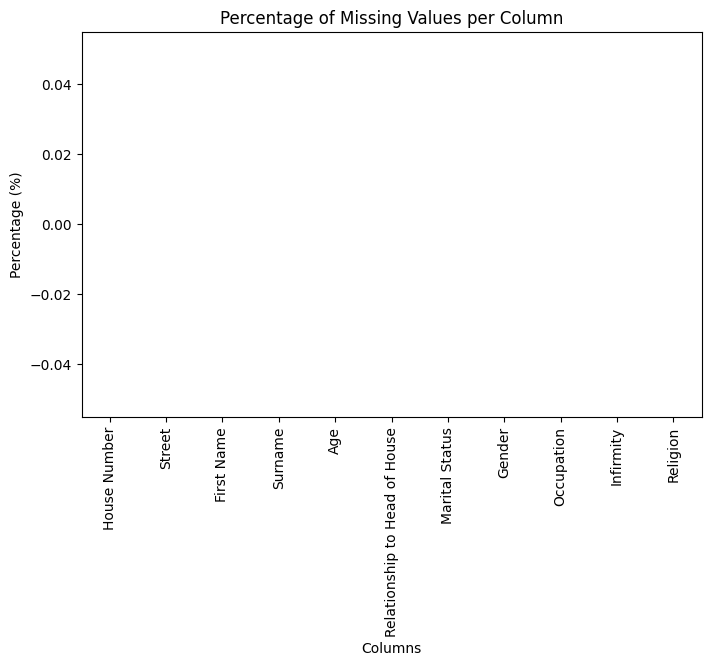

In [32]:
# Calculate missing values percentage
missing_percentage = df.isnull().mean() * 100

# Plot the missing data as a bar plot
plt.figure(figsize=(8, 5))
missing_percentage.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Missing Values per Column')
plt.savefig('./preprocessed_data.png', bbox_inches='tight' )
plt.show()

##### Age pyramid

In [33]:
# Creating age bin for age pyramid
def age_bin(age):
    if age < 9:
        return '0-9'
    elif 10 <= age <= 19:
        return '10-19'
    elif 20 <= age <= 29:
        return '20-29'
    elif 30 <= age <= 39:
        return '30-39'
    elif 40 <= age <= 49:
        return '40-49'
    elif 50 <= age <= 59:
        return '50-59'
    elif 60 <= age <= 69:
        return '60-69'
    elif 70 <= age <= 79:
        return '70-79'
    elif 80 <= age <= 89:
        return '80-89'
    elif 90 <= age <= 99:
        return '90-99'
    elif age >= 99:
        return '99+'
    else:
        'Out of range'


In [34]:
df['Age_bin'] = df['Age'].apply(age_bin)
df['Age_bin'].unique()

array(['40-49', '10-19', '30-39', '0-9', '50-59', '20-29', '80-89', '99+',
       '60-69', '70-79', None, '90-99'], dtype=object)

In [35]:
# Creating the statistics for age pyramid
female_data = df[df['Gender'] == 'Female']
male_data = df[df['Gender'] == 'Male']
# grouping the male and female as per age groups
female_df = female_data.groupby('Age_bin').size().reset_index(name='Female')
male_df = male_data.groupby('Age_bin').size().reset_index(name='Male')
age_population_df = pd.merge(female_df, male_df, on='Age_bin', how='outer').fillna(0)
age_population_df['Male'] = age_population_df['Male'].multiply(-1)
age_population_df.transpose()

,0,1,2,3,4,5,6,7,8,9,10
Age_bin,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,99+
Female,424,563,578,715,685,532,318,201,110,11,6
Male,-433,-569,-493,-537,-563,-464,-303,-173,-104,-11,-6


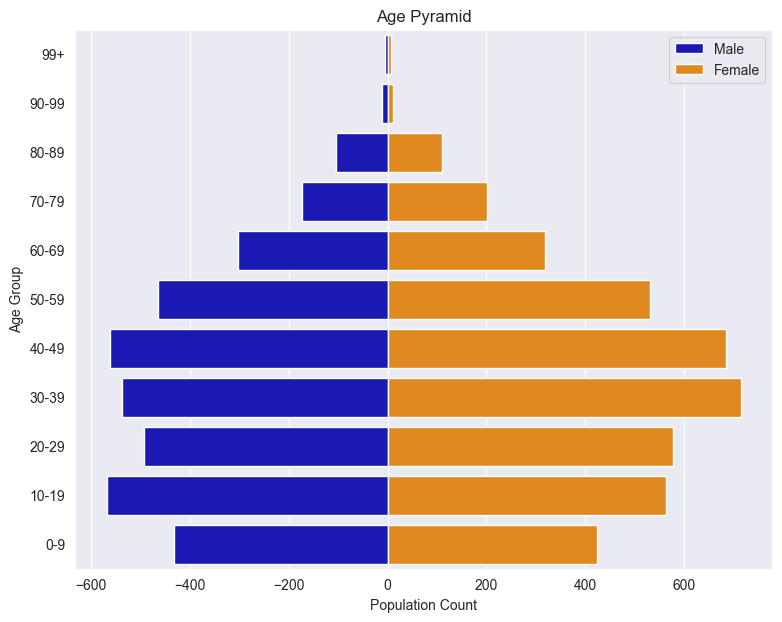

In [36]:
#Plotting the age pyramid
plt.figure(figsize=(9, 7))
sns.set_style("darkgrid")
age_pyramid = sns.barplot(x = 'Male', y = 'Age_bin', data = age_population_df, color=('mediumblue'), label='Male')
age_pyramid = sns.barplot(x = 'Female', y = 'Age_bin', data = age_population_df, color=('darkorange'), label='Female')
age_pyramid.invert_yaxis()
age_pyramid.legend() 
plt.title('Age Pyramid')
age_pyramid.set(xlabel='Population Count', ylabel='Age Group')
plt.savefig('./age_pyramid.png', bbox_inches='tight')


##### Unemployement trends

Age
20     1
21     1
22     1
23     6
24    11
25     7
26     7
27     9
28    14
29    11
30    12
31     8
32     9
33     8
34    14
35    16
36    13
37    10
38    17
39    13
40    15
41    11
42    23
43     6
44    18
45    20
46    13
47     8
48     9
49    10
50    13
51    13
52     7
53    12
54     7
55    16
56    11
57     4
58     9
59     5
60     4
61     3
62     4
63     2
64     2
65     7
66     2
67     6
68     3
69     3
70     5
72     2
73     1
74     3
77     2
78     2
79     1
80     1
97     1
Name: count, dtype: int64
Age
0       69
1       89
2       86
3       88
4      105
      ... 
101      2
102      2
103      1
104      3
105      2
Name: count, Length: 105, dtype: int64
Age
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
101    0.0
102    0.0
103    0.0
104    0.0
105    0.0
Name: count, Length: 105, dtype: float64


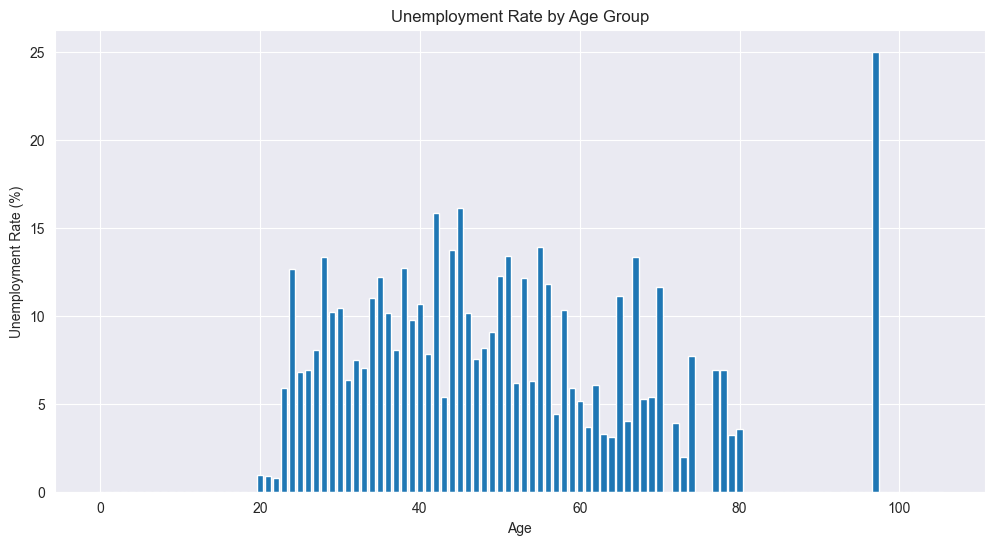

In [37]:
# Filter the dataset for unemployed individuals
unemployed_data = df[df['Occupation'] == 'Unemployed']
# Group unemployment data by age and calculate counts and sort
unemployment_by_age = unemployed_data['Age'].value_counts().sort_index()
print(unemployment_by_age)
#Get overall age count for different age groups
total_by_age = df['Age'].value_counts().sort_index()
print(total_by_age)
# Calculate overall unemployment percentage by age group
unemployment_rate_by_age = (unemployment_by_age / total_by_age * 100).fillna(0)
print(unemployment_rate_by_age)
#Plotting the unemployment trends by age vs percentage of unemployment
plt.figure(figsize=(12, 6))
plt.bar(unemployment_rate_by_age.index, unemployment_rate_by_age.values)
plt.title("Unemployment Rate by Age Group")
plt.xlabel("Age")
plt.ylabel("Unemployment Rate (%)")
plt.savefig('./unemployment_ trends.png', bbox_inches='tight')
plt.show()


In [38]:
# Calculate the overall unemployment rate for the town
overall_unemployment_rate = (unemployed_data.shape[0] / df.shape[0]) * 100
print(f"Overall Unemployment Rate in the town: {overall_unemployment_rate}%")

# National average unemployment rate (ONS 2021)
national_unemployment_rate = 4.2

# Perform a t-test to compare the unemployment rate in the town with the national rate
# Assuming a large enough sample size, you can use the t-test approach
# Calculate the standard error of the mean (SE) for the unemployment rate in the dataset
sample_size = unemployed_data.shape[0]
std_dev = unemployed_data['Age'].std()  # Approximate standard deviation of age as proxy
se = std_dev / np.sqrt(sample_size)

# Calculate the t-statistic
t_statistic = (overall_unemployment_rate - national_unemployment_rate) / se

# Degrees of freedom (df) for the t-distribution
df_t = sample_size - 1

# Calculate the p-value for the one-tailed test
p_value = 1 - stats.t.cdf(t_statistic, df_t)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation of the p-value
if p_value < 0.05:
    print("The unemployment rate in the town is significantly higher than the national average.")
else:
    print("There is no significant difference between the unemployment rate in the town and the national average.")

Overall Unemployment Rate in the town: 5.970904490828589%
T-statistic: 2.986915637825636
P-value: 0.0014825198367061088
The unemployment rate in the town is significantly higher than the national average.


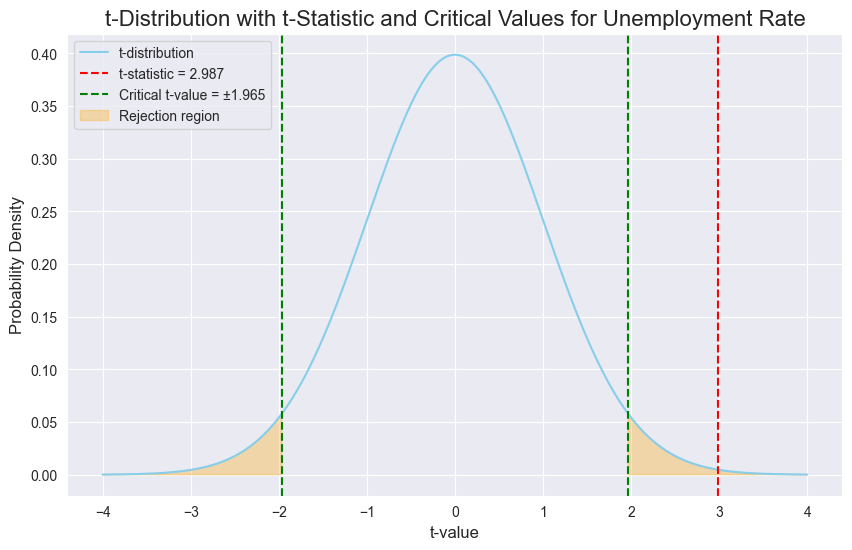

In [39]:
#Hypothesis testing
# Calculate the overall unemployment rate in the town (sample mean)
sample_mean = overall_unemployment_rate  
sample_size = unemployed_data.shape[0]

# Calculate the standard deviation
std_dev = unemployed_data['Age'].std() 

# Standard error (SE)
se = std_dev / math.sqrt(sample_size)

# Calculate the t-statistic
t_statistic = (sample_mean - national_unemployment_rate) / se

# Parameters for the plot
alpha = 0.05  # Significance level
deg_freedom = sample_size - 1  # Degrees of freedom

# the range for the t-distribution (from -4 to +4 t-values)
x = np.linspace(-4, 4, 1000)

# Plot the t-distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, stats.t.pdf(x, deg_freedom), label="t-distribution", color='skyblue')

# Mark the observed t-statistic on the plot
plt.axvline(t_statistic, color='red', linestyle='--', label=f't-statistic = {t_statistic:.3f}')

# Critical value for the two-tailed test
t_critical = stats.t.ppf(1 - alpha / 2, deg_freedom)  # For two-tailed test
plt.axvline(t_critical, color='green', linestyle='--', label=f'Critical t-value = ±{t_critical:.3f}')
plt.axvline(-t_critical, color='green', linestyle='--')

# Fill the rejection regions
plt.fill_between(x, 0, stats.t.pdf(x, deg_freedom), where=(x >= t_critical) | (x <= -t_critical), color='orange', alpha=0.3, label="Rejection region")
plt.title('t-Distribution with t-Statistic and Critical Values for Unemployment Rate', fontsize=16)
plt.xlabel('t-value', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.legend()
plt.savefig('./unemployment_Hypo_Test.png', bbox_inches='tight')
# Show the plot
plt.show()


#### Religious affliations

C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_17644\2463514189.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  religion_by_age = df.groupby([age_groups, 'Religion']).size().unstack(fill_value=0)


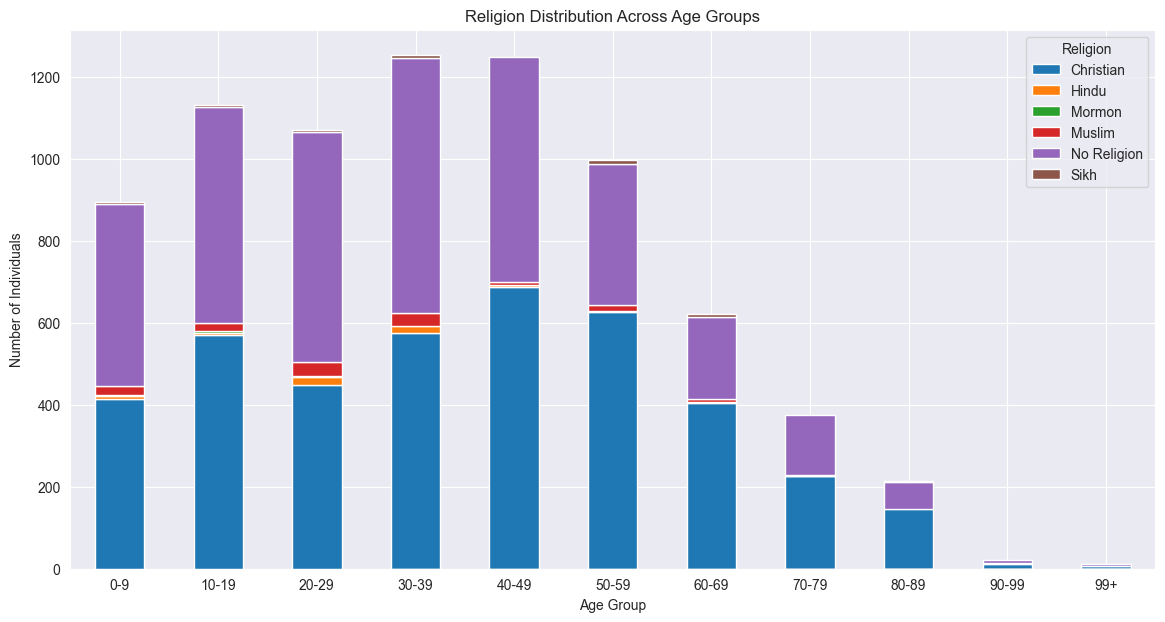

In [40]:
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, float('inf')]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '99+']
# Group by religion and count individuals
religion_counts = df['Religion'].value_counts()

# Analyzing trends for age vs religion
age_groups = pd.cut(df['Age'], bins=bins, labels=labels)
religion_by_age = df.groupby([age_groups, 'Religion']).size().unstack(fill_value=0)

# Visualization: Religion by age group
religion_by_age.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title("Religion Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Number of Individuals")
plt.xticks(rotation=0)
plt.legend(title="Religion")
plt.savefig('./religious_affiliations.png', bbox_inches='tight')
plt.show()


#### Divorce vs marriage

In [41]:
counts = df['Marital Status'].value_counts()
print(counts)
total_population = counts.sum()
print(total_population)
marriage_count = df[df['Marital Status'] == 'Married'].value_counts().sum()
print(marriage_count)
divorce_count = df[df['Marital Status'] == 'Divorced'].value_counts().sum()
print(divorce_count)
marriage_rate = (marriage_count / total_population) * 100
divorce_rate = (divorce_count / total_population) * 100

print(f"Marriage Rate: {marriage_rate:.2f}%")
print(f"Divorce Rate: {divorce_rate:.2f}%")

Marital Status
Single      4619
Married     2252
Divorced     706
Widowed      328
Name: count, dtype: int64
7905
2252
706
Marriage Rate: 28.49%
Divorce Rate: 8.93%


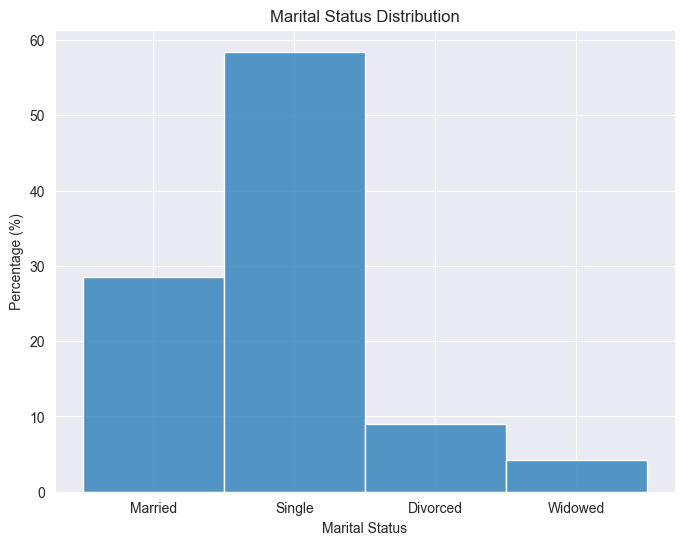

In [42]:
# Visualize marital status distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Marital Status'],stat='percent', discrete=True, kde=False)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Percentage (%)')
plt.savefig('./marital_status.png', bbox_inches='tight')
plt.show()



#### Occupancy

In [43]:
# Group by 'House Number' and count the number of people per house
occupancy_data = df.groupby(['House Number', 'Street']).size().reset_index(name='Occupants')
print(occupancy_data)
# Calculate average number of people per house
average_occupants = occupancy_data['Occupants'].mean()
# Determine under or over-occupancy based on a typical housing standard 
under_occupied = occupancy_data[occupancy_data['Occupants'] < 2.4]
over_occupied = occupancy_data[occupancy_data['Occupants'] > 3]

# Display the results
print(f"Average number of people per house: {average_occupants:.2f}")
print(f"Number of under-occupied houses (less than 3 people): {len(under_occupied)}")
print(f"Number of over-occupied houses (more than 4 people): {len(over_occupied)}")


      House Number          Street  Occupants
0                1    Alba Citadel          3
1                1      Alba Drive          3
2                1    Albans Folly          2
3                1    Albion Wells          1
4                1  Ambrosia Drive          2
...            ...             ...        ...
2928           189   Smith Harbors          4
2929           190   Smith Harbors          6
2930           191   Smith Harbors          4
2931           192   Smith Harbors          4
2932           193   Smith Harbors          2

[2933 rows x 3 columns]
Average number of people per house: 2.70
Number of under-occupied houses (less than 3 people): 1490
Number of over-occupied houses (more than 4 people): 840


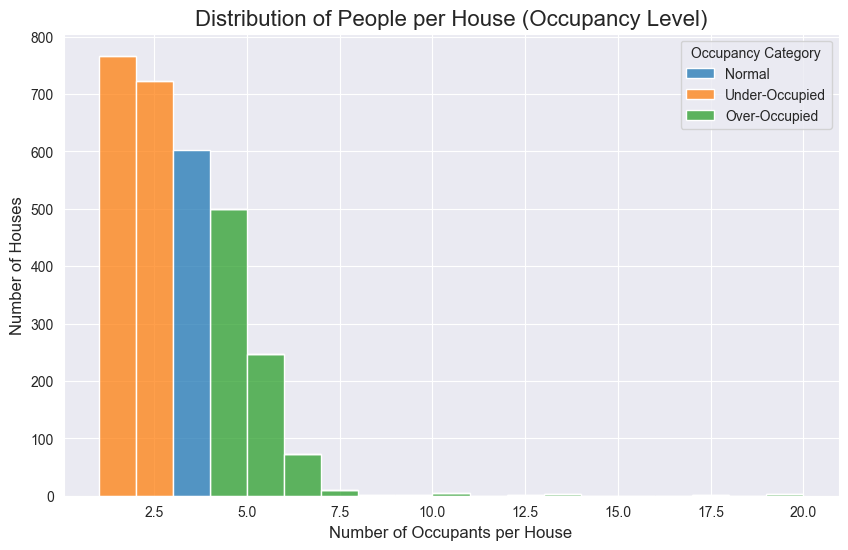

In [44]:
# Add a new column to classify occupancy levels: 'Under-Occupied', 'Normal', 'Over-Occupied'
occupancy_data['Occupancy Category'] = 'Normal'  # Default category

# Classify as under-occupied or over-occupied based on 2.4 and 3.0 people per house(as per ONS 2021)
occupancy_data.loc[occupancy_data['Occupants'] < 2.4, 'Occupancy Category'] = 'Under-Occupied'
occupancy_data.loc[occupancy_data['Occupants'] > 3, 'Occupancy Category'] = 'Over-Occupied'

# Plot the histogram with Seaborn and hue parameter to color by occupancy category
plt.figure(figsize=(10, 6))
sns.histplot(occupancy_data, x='Occupants', bins=range(1, occupancy_data['Occupants'].max() + 1), hue='Occupancy Category', multiple='stack')

# Title and labels
plt.title('Distribution of People per House (Occupancy Level)', fontsize=16)
plt.xlabel('Number of Occupants per House', fontsize=12)
plt.ylabel('Number of Houses', fontsize=12)
plt.savefig('./Occupancy.png', bbox_inches='tight')
# Show the plot
plt.show()


In [45]:
# Parameters from the dataset
sample_mean = occupancy_data['Occupants'].mean()  # Sample mean (average occupants per house)
sample_std = occupancy_data['Occupants'].std()   # Sample standard deviation
sample_size = occupancy_data.shape[0]            # Number of houses
population_mean = 2.4                            #The average household size was 2.4 people per house (source: Census 2021 for England and Wales).


# Calculate the t-statistic
t_statistic = (sample_mean - population_mean) / (sample_std / math.sqrt(sample_size))

# Calculate degrees of freedom
deg_freedom = sample_size - 1

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - t.cdf(abs(t_statistic), deg_freedom))

# Display results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"Sample Size: {sample_size}")
print(f"t-Statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

# Decision Rule
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The average occupancy per house is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the sample mean and the population mean.")


Sample Mean: 2.70
Sample Standard Deviation: 1.55
Sample Size: 2933
t-Statistic: 10.284
P-value: 0.000
Reject the null hypothesis: The average occupancy per house is significantly different from the population mean.


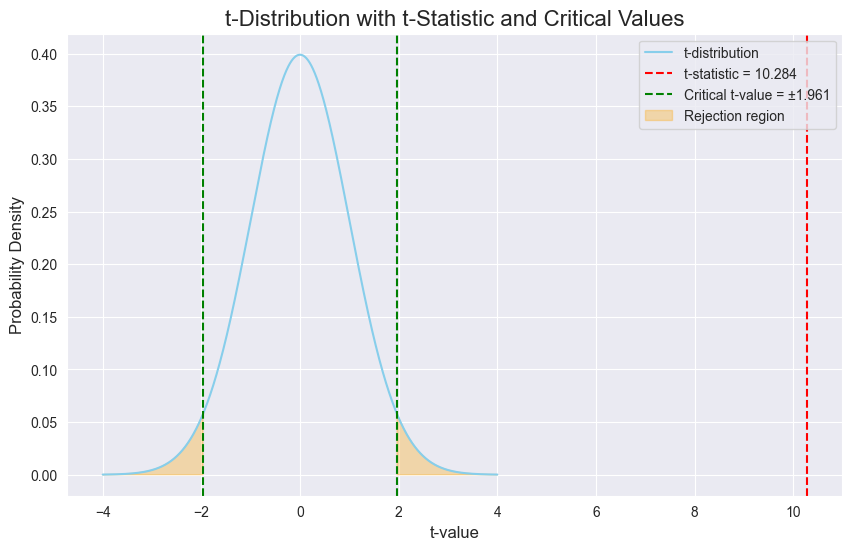

In [46]:
# Parameters from the hypothesis test
alpha = 0.05
deg_freedom = sample_size - 1
t_statistic = (sample_mean - population_mean) / (sample_std / math.sqrt(sample_size))

# Define the range for the t-distribution (from -4 to +4 t-values)
x = np.linspace(-4, 4, 1000)

# Plot the t-distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, t.pdf(x, deg_freedom), label="t-distribution", color='skyblue')

# Mark the observed t-statistic on the plot
plt.axvline(t_statistic, color='red', linestyle='--', label=f't-statistic = {t_statistic:.3f}')

# Critical value for the two-tailed test
t_critical = t.ppf(1 - alpha / 2, deg_freedom)  # For two-tailed test
plt.axvline(t_critical, color='green', linestyle='--', label=f'Critical t-value = ±{t_critical:.3f}')
plt.axvline(-t_critical, color='green', linestyle='--')

# Fill the rejection regions
plt.fill_between(x, 0, t.pdf(x, deg_freedom), where=(x >= t_critical) | (x <= -t_critical), color='orange', alpha=0.3, label="Rejection region")

plt.title('t-Distribution with t-Statistic and Critical Values', fontsize=16)
plt.xlabel('t-value', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.legend()
plt.savefig('./Occupancy_hypothesis.png', bbox_inches='tight')
plt.show()


#### Birth rate and death rate

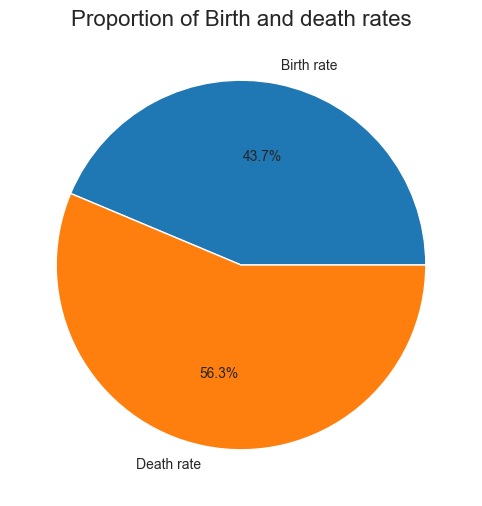

In [47]:
#We count how many individuals in the dataset have Age = 0, which represents newborns.
#We calculate the total number of individuals in the dataset using df.shape[0].
birth_rate =  df[df['Age'] == 0].shape[0]
#The age pyramid shows a significant decrease in the population after age 89. 
#The median age at death provided by the ONS for males (81.8 years) and females (85.5 years) averages to 83.65 years. This is a reasonable central reference point.
#Using 85 years as the age threshold is a balanced approach that aligns with both the ONS-reported medians and the visual trend from the age pyramid.
death_rate =  df[df['Age'] >85].shape[0]

labels = ['Birth rate','Death rate']
sizes= [birth_rate,death_rate ]
plt.figure(figsize = (8,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of Birth and death rates', fontsize=16)
plt.savefig('./birthvsdeathrate.png', bbox_inches='tight')
plt.show()

#### Number of University students

In [48]:
# Filter rows where 'Occupation' contains 'student' (case-insensitive)
student_occupations = df[df['Occupation'].str.contains('student', case=False, na=False)]['Occupation'].unique()
print(student_occupations)

['Student' 'University Student' 'PhD Student']


In [49]:
# Filter for students 
students = df[df['Occupation'].isin(['Student', 'University Student', 'PhD Student'])]
# Count the number of university students
print(f"Number of students: {len(students)}")


Number of students: 1986


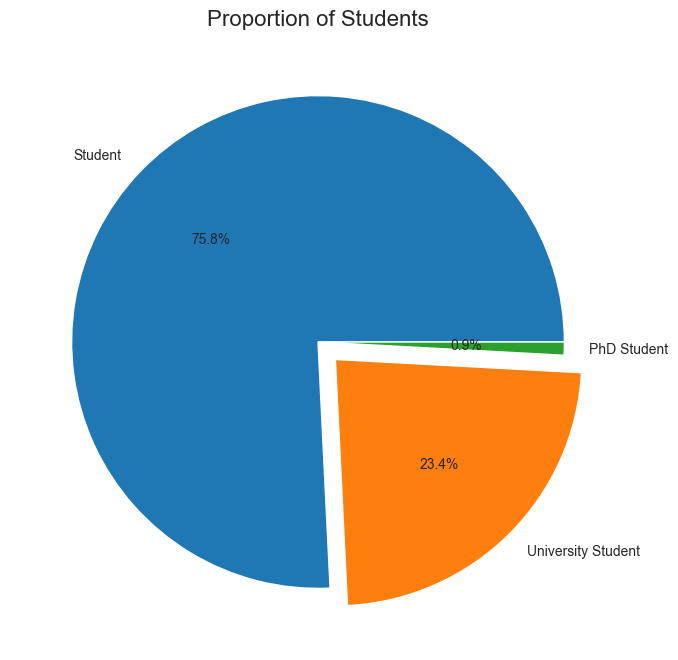

In [50]:
# Count all students and university students
students_count = students['Occupation'].value_counts()

#pie chart
plt.figure(figsize=(8, 8))
# university students
explode = [0.1 if occ == 'University Student' else 0 for occ in students_count.index]  
plt.pie(students_count, labels=students_count.index, autopct='%1.1f%%', explode=explode)
plt.title('Proportion of Students', fontsize=16)
plt.savefig('./NoofUnistudents.png', bbox_inches='tight')
# Show the plot
plt.show()


#### Commuters

In [51]:
# Filter the dataset for individuals for some of the occupations that are likely to be commuters
likely_commuters = df[df['Occupation'].str.contains('Pilot|Lecturer|Librarian|Immigration officer|Marine scientist|Architectural technologist|Air traffic controller|Aeronautical engineer')]
# Count the number of likely commuters
print(f"Number of likely commuters: {len(likely_commuters)}")


Number of likely commuters: 88
